# Normality Test :

There are a range of techniques that we can use to check if the data sample deviates from a Gaussian distribution, called normality tests.

tests for normal distribution in a population sample.

In [1]:
import numpy as np

# seed the random number generator
np.random.seed(1)

# generate gaussian data
# generate univariate observations
data = 5 * np.random.randn(100) + 50

# summarize
print('mean=%.3f stdv=%.3f' % (np.mean(data), np.std(data)))

mean=50.303 stdv=4.426


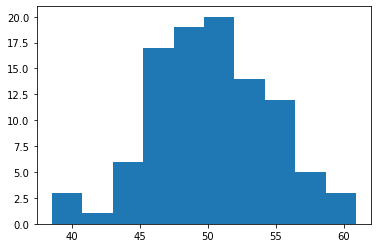

In [2]:
# histogram plot
import matplotlib.pyplot as plt

plt.hist(data)
plt.show()

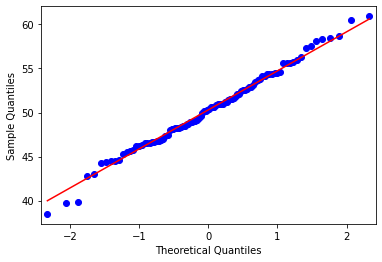

In [3]:
from statsmodels.graphics.gofplots import qqplot

# Quantile-Quantile Plot
qqplot(data, line='s')
plt.show()

## 1. Shapiro-Wilk Test
Tests whether a data sample has a Gaussian distribution.

In [98]:
'''
## Assumptions
Observations in each sample are independent and identically distributed (iid).

## Interpretation
H0: the sample has a Gaussian distribution.
H1: the sample does not have a Gaussian distribution.

## Python Code
# Example of the Shapiro-Wilk Normality Test
'''
from scipy.stats import shapiro

# data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]

stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))

# interpret
if p > 0.05:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

stat=0.992, p=0.822
Sample looks Gaussian (fail to reject H0)


## 2. D’Agostino’s K^2 Test
Tests whether a data sample has a Gaussian distribution.

The D’Agostino’s K^2 test calculates summary statistics from the data, namely kurtosis and skewness, to determine if the data distribution departs from the normal distribution, named for Ralph D’Agostino.

Skew : a quantification of how much a distribution is pushed left or right, a measure of asymmetry in the distribution.

Kurtosis : quantifies how much of the distribution is in the tail. It is a simple and commonly used statistical test for normality.

In [36]:
'''
## Assumptions
Observations in each sample are independent and identically distributed (iid).

## Interpretation
H0: the sample has a Gaussian distribution.
H1: the sample does not have a Gaussian distribution.

## Python Code
# Example of the D'Agostino's K^2 Normality Test
'''
from scipy.stats import normaltest

data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]

stat, p = normaltest(data)
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=3.392, p=0.183
Probably Gaussian


C:\Users\PR269KB\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## 3. Anderson-Darling Test
Tests whether a data sample has a Gaussian distribution.

Anderson-Darling Test is a statistical test that can be used to evaluate whether a data sample comes from one of among many known data samples, named for Theodore Anderson and Donald Darling.

It can be used to check whether a data sample is normal. The test is a modified version of a more sophisticated nonparametric goodness-of-fit statistical test called the Kolmogorov-Smirnov test.

A feature of the Anderson-Darling test is that it returns a list of critical values rather than a single p-value. This can provide the basis for a more thorough interpretation of the result.

In [37]:
'''
## Assumptions
Observations in each sample are independent and identically distributed (iid).

## Interpretation
H0: the sample has a Gaussian distribution.
H1: the sample does not have a Gaussian distribution.

## Python Code
# Example of the Anderson-Darling Normality Test
'''
from scipy.stats import anderson

data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]

result = anderson(data)
print('stat=%.3f' % (result.statistic))

for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('Probably Gaussian at the %.1f%% level' % (sl))
    else:
        print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=0.424
Probably Gaussian at the 15.0% level
Probably Gaussian at the 10.0% level
Probably Gaussian at the 5.0% level
Probably Gaussian at the 2.5% level
Probably Gaussian at the 1.0% level


# 4. Kolmogorov-Smirnov test:
Performs the one sample or two samples test for goodness of fit.

In [38]:
from scipy.stats import kstest, norm, t

# set random seed to get the same result
np.random.seed(987654321)

In [39]:
x = np.linspace(-15, 15, 9)
print(kstest(x, 'norm'))

KstestResult(statistic=0.4443560271592436, pvalue=0.03885014008678811)


In [32]:
print(kstest(norm.rvs(size=100), norm.cdf))

KstestResult(statistic=0.058352892479417884, pvalue=0.8653960860778898)

In [16]:
print(kstest(norm.rvs, 'norm', N=100))

KstestResult(statistic=0.04800317028247314, pvalue=0.9668132834668092)

In [17]:
# Test against one-sided alternative hypothesis
# Shift distribution to larger values, so that CDF(x) < norm.cdf(x):

x = norm.rvs(loc=0.2, size=100)
print(kstest(x, 'norm', alternative='less'))

KstestResult(statistic=0.07905316403593618, pvalue=0.27210235764750884)

In [18]:
# Reject equal distribution against alternative hypothesis: less

print(kstest(x, 'norm', alternative='greater'))

KstestResult(statistic=0.039459739311587264, pvalue=0.713828651849974)

In [19]:
# Don’t reject equal distribution against alternative hypothesis: greater

print(kstest(x, 'norm'))

KstestResult(statistic=0.07905316403593618, pvalue=0.5334586665938388)

In [20]:
# Testing t distributed random variables against normal distribution
# With 100 degrees of freedom the t distribution looks close to the normal distribution, and the K-S test does not reject the hypothesis that the sample came from the normal distribution:

print(kstest(t.rvs(100, size=100), 'norm'))

KstestResult(statistic=0.10927659201120843, pvalue=0.1703707471117808)

In [21]:
# With 3 degrees of freedom the t distribution looks sufficiently different from the normal distribution, that we can reject the hypothesis that the sample came from the normal distribution at the 10% level:

print(kstest(t.rvs(3, size=100), 'norm'))

KstestResult(statistic=0.060516215932486295, pvalue=0.8355461126016654)